<a href="https://colab.research.google.com/github/dipak12-11/Dog_Breed_Classfier-Transfer-Learning-/blob/main/Kaggle_BullDozer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Sale Price of Bulldozers 🚜 using Machine Learning.

# 1. Problem Defiantion




How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

# 2. Data

Data set : https://www.kaggle.com/c/bluebook-for-bulldozers/data
1. Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
2. Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
3. Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

# 3. Evaluation

For this problem, Kaggle has set the evaluation metric to being root mean squared log error (RMSLE). As with many regression evaluations, the goal will be to get this value as low as possible.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the Kaggle leaderboard.

In [ ]:
import datetime
print(f"Notebook last run(end-to-end):{datetime.datetime.now()}")

Notebook last run(end-to-end):2024-07-10 11:24:27.188979


# 4. Getting out Tools Ready !

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import calendar
import seaborn as sns
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV



In [ ]:
!wget https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip # download files from GitHub as zip

import os
import zipfile

local_zip = 'bluebook-for-bulldozers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('.') # extract all data into current working directory
zip_ref.close()

--2024-07-10 11:24:27--  https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip [following]
--2024-07-10 11:24:27--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72077822 (69M) [application/zip]
Saving to: ‘bluebook-for-bulldozers.zip.1’

bluebook-for-bulldo 100%[===================>]  68.74M   159MB/s    in 0.4s    

2024-07-10 11:24:28 (1

In [ ]:
#import the training and validation data set.
df=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

## Parsing Dates
When working with time series data , its good idea to make sure any date data isin the format of Datetime object.

In [ ]:
df=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [ ]:
# from IPython.display import display,Image
# url="/content/drive/MyDrive/temp -1-1-1.png"
# display(Image(url))

## EDA [ Exploaitry Data Analysisi ]

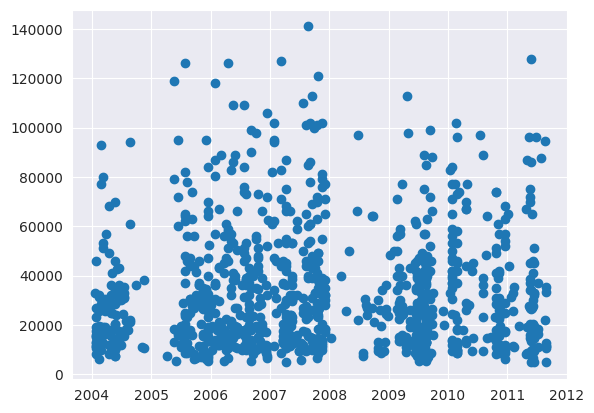

In [ ]:
# fig,ax=plt.subplots()
plt.scatter(df.saledate[:1000],df.SalePrice[:1000]);

>> Very less between mid 2004 to mid 2004 and in 2008 - 2009.

In [ ]:
df.head().T # Trnspose helps to see data having large number of

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort Data Frame by salesdate

In [ ]:
# sorting
df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [ ]:
df.saledate.head(5)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a cpoy of the original DataSet

In [ ]:
df_tmp=df.copy()

### Adding Datetime parameters for saledate column


In [ ]:
df_tmp["saleYear"]= df_tmp.saledate.dt.year
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayofweek"]=df.saledate.dt.dayofweek
df_tmp["saleDayofyear"]=df_tmp.saledate.dt.dayofyear
df_tmp.drop("saledate",axis=1,inplace=True)
df_tmp.tail(20).T

,406079,409783,411522,412218,411527,406092,409780,406167,411334,412164,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,6258623,6286233,6310488,6319596,6310504,6258697,6286207,6259091,6306548,6318085,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,22000.0,24000.0,7000.0,20500.0,6000.0,31000.0,25000.0,26000.0,36000.0,5500.0,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1877704,1932403,1911585,1887135,1921721,1907659,1848914,1789854,1878032,1873607,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,3192,4605,9550,18110,9550,3239,4605,3180,28919,10402,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149
auctioneerID,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,2001,2005,1000,2005,1996,2001,2004,2005,2004,2001,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,590SUPER M,310G,753,BL60,753,850H,310G,580SUPER M,WA2505L,1300,544H,317,S175,WA320,710VHP,D38E,2064,337G,12G,544H


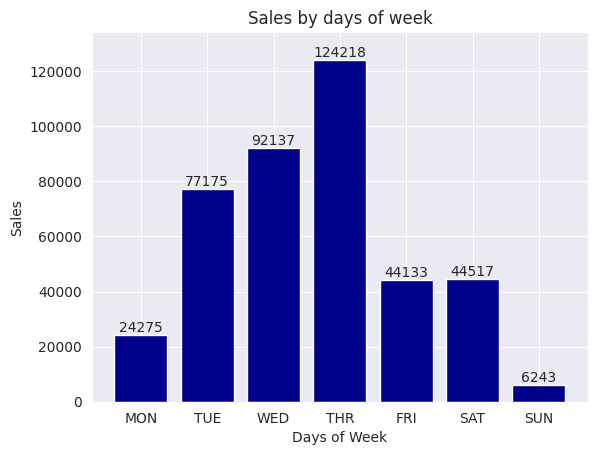

In [ ]:
# let's check which Day of the week is the busiest
sales_by_day=df_tmp.saleDayofweek.value_counts().sort_index()
days=["MON",'TUE','WED','THR','FRI','SAT','SUN']
sales_by_day.index=days
bars=plt.bar(days,sales_by_day,color='darkblue')
for bar in bars:
    # height = bar.get_height()
    plt.annotate(str(bar.get_height()),
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 5),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='center')

plt.xlabel("Days of Week")
plt.ylabel("Sales")
plt.title("Sales by days of week")
plt.ylim(0, max(sales_by_day)+10000)
plt.show()

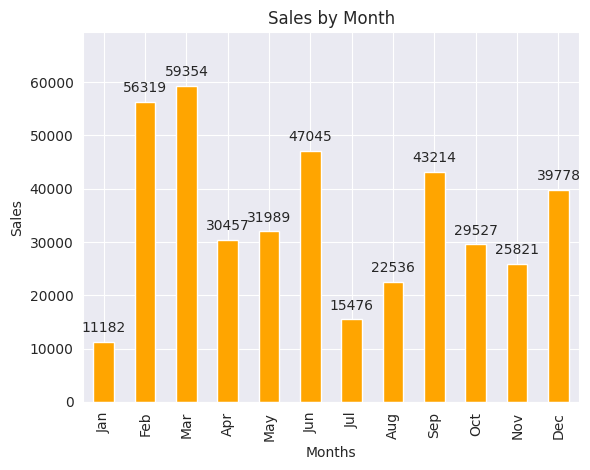

In [ ]:
# lets see whcih month has the highest sale
sales_by_month=df_tmp.saleMonth.value_counts().sort_index()
month_name=list(calendar.month_abbr)[1:]
sales_by_month.index=month_name
sns.set_style('darkgrid')
ax=sales_by_month.plot(kind='bar',color='Orange')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x()+p.get_width()/2.0,p.get_height()),xytext=(0,10),textcoords='offset points',ha='center',va='center')
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Sales by Month")
plt.ylim(0,max(sales_by_month)+10000)
plt.show()

# Filling up empty data columns
* Earlier we have notices that a lot of columns are empty. we need to fill them up, prior to getting started with **modeling.**

## Coverting Str>> Categories >>Numeric

In [ ]:
# save preprocessed data
df_tmp.to_csv("/content/bluebook-for-bulldozers/train_tmp.csv",index=False)

In [ ]:
#Loade the preprocessed data
df_tmp=pd.read_csv("/content/bluebook-for-bulldozers/train_tmp.csv",low_memory=False)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [ ]:
# coverting string into categories
for label,content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)
    df_tmp[label]= content.astype('category').cat.as_ordered()

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


##CONVERTING CATEROGICAL DATA INTO NUMERIC


In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

In [ ]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1

In [ ]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

# MODELLING

## SPLIT DATA INTO TRAING AND VALIDATION SET


In [ ]:
df_tmp.shape

(412698, 103)

In [ ]:
df_valid=df_tmp[df_tmp.saleYear==2012]
df_train=df_tmp[df_tmp.saleYear!=2012]

In [ ]:
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_valid.drop("SalePrice",axis=1),df_valid.SalePrice
len(X_train)

401125

## BUILDING AN EVALUATION FUNCTION
**According to Kaggle for the Bluebook for Bulldozers competition, the evaluation function they use is root mean squared log error (RMSLE**

In [ ]:
# making the costom evaluation function as per kaggle requirement
def rmsle(y_test,y_preds):
  return np.sqrt(mean_squared_log_error(y_test,y_preds))

In [ ]:
def show_score(model):
  train_preds=model.predict(X_train)
  val_preds=model.predict(X_valid)
  scores={
      "Training MAE":mean_absolute_error(y_train,train_preds),
      "Validation MAE":mean_absolute_error(y_valid,val_preds),
      "Training RMSLE":rmsle(y_train,train_preds),
      "Validation RMSLE":rmsle(y_valid,val_preds),
      "Training R^2":model.score(X_train,y_train),
      "Validation R^2":model.score(X_valid,y_valid)
      }
  return scores

## MODEL SELECTION

In [ ]:
model=RandomForestRegressor(n_jobs=1,max_samples=10000,random_state=42)

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=1, random_state=42)

In [ ]:
show_score(model)

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Validation RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Validation R^2': 0.8320374995090507}

# HYPER PARAMETER TUNING WITH RANDOMSEARCHCV

In [ ]:
# DIFFERENT RANDOMFORESTCLASSIFIER HYPERPARAMETERS
rf_distribution={
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features":[0.5,1.0,"log2"],
    "max_samples":[10000]

}

rs_model=RandomizedSearchCV(RandomForestRegressor(),param_distributions=rf_distribution,n_iter=200,cv=5,verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [ ]:
10*4*10*10*10*3*1

In [ ]:
# rs_model.best_params_

In [ ]:
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

In [ ]:
ideal_model.fit(X_train,y_train)

In [ ]:
show_score(ideal_model)

# MAKE PREDICTION WITH ON TEST SET

In [ ]:
df_test=pd.read_csv("/content/bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=["saledate"])

# Preprocessing the test data
**REMEMBER: Whatever you do to the training data, you have to do to the test data.**

In [ ]:

def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)

    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1

    return df

In [ ]:
df_test=preprocess_data(df_test)

In [ ]:
print(df_test.shape,'\n')
X_train.shape

**We can clearly observe clearly that one column is missing in the test data set.**

In [ ]:
#Let's check which of the data column is missing
set(X_train)-set(df_test)

**We observe that the 'auctioneerID_is_missing' is missing. now we need to create this column in the deat datset manually.**

In [ ]:
df_test["auctioneerID_is_missing"] = False

In [ ]:
#Match the column order from X_train to df_test (to predict on column ,they should be in the same oreder as in the X_train )

df_test = df_test[X_train.columns]

In [ ]:
test_preds=ideal_model.predict(df_test)

In [ ]:
# create Dataframe compatible with Kaggle submission requirement
df_preds=pd.DataFrame()
df_preds["SaleID"]=df_test["SalesID"]
df_preds["SalePrice"]=test_preds

In [ ]:
df_preds.head()

In [ ]:
# Export to csv...
df_preds.to_csv("bluebook-for-bulldozers_predictions.csv",
               index=False)

#FEATURE IMPORTANCE

In [ ]:
ideal_model.feature_importances_

In [ ]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))

    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)
